Zaimportowanie bibliotek


In [25]:
import pygad
import numpy as np


Stworzenie listy przedmiotów z ich wartościami oraz wagami i ustalenie wagi maksymalnej na 25 [kg]


In [26]:
items = [
    {"id": 0, "name": "zegar", "value": 100, "weight": 7},
    {"id": 1, "name": "obraz-pejzaż", "value": 300, "weight": 7},
    {"id": 2, "name": "obraz-portret", "value": 200, "weight": 6},
    {"id": 3, "name": "radio", "value": 40, "weight": 2},
    {"id": 4, "name": "laptop", "value": 500, "weight": 5},
    {"id": 5, "name": "lampka nocna", "value": 70, "weight": 6},
    {"id": 6, "name": "srebrne sztućce", "value": 100, "weight": 1},
    {"id": 7, "name": "porcelana", "value": 250, "weight": 3},
    {"id": 8, "name": "figura z brązu", "value": 300, "weight": 10},
    {"id": 9, "name": "skórzana torebka", "value": 280, "weight": 3},
    {"id": 10, "name": "odkurzacz", "value": 300, "weight": 15}
]

weight_limit = 25


Zdefiniowanie puli genów jako liczb 0 i 1


In [27]:
gene_space = [0, 1]


Stworzenie funkcji fitness, która jako wynik zwraca wartość przedmiotów jeśli ich waga jest mniejsza lub równa 25 [kg], lub 0 w pozostałych przypadkach


In [28]:
def fitness_function(solution, solution_idx):
    picked_items = [item for item in items if solution[item["id"]]]
    weight = np.sum([item["weight"] for item in picked_items])
    value = np.sum([item["value"] for item in picked_items])
    return 0 if weight > weight_limit else value


Ustalenie wielkości populacji na 20 chromosomów oraz liczby genów każdego chromosomu na liczbe elementów listy


In [29]:
sol_per_pop = 20
num_genes = len(items)


Ustalenie liczby rodziców do "rozmnażania" na 10, liczby generacji na 30 oraz ilość rodziców do zachowania pomiędzy generacjami na 4


In [30]:
num_parents_mating = 10
num_generations = 30
keep_parents = 4


Ustalenie typu selekcji rodziców oraz ilości punktów, w których należy robić krzyżowanie chromosomów


In [31]:
parent_selection_type = "sss"
crossover_type = "single_point"


Ustalenie typu mutacji na losową oraz procentu mutowanych genów na 10%


In [32]:
mutation_type = "random"
mutation_percent_genes = 10


Inicjalizacja oraz uruchomienie algorytmu ze zdefiniowanymi parametrami


In [33]:
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes
)

ga_instance.run()


Najlepszy znaleziony chromosom oraz jego ocena


In [34]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))


Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630


Lista wybranych przedmiotów, ich wartość oraz waga


In [35]:
chosen_items = [item for item in items if solution[item["id"]]]
print("Picked items: ")
for item in chosen_items:
    print("{}, value = {}, weight = {}".format(item["name"],
          item["value"], item["weight"]))
print("Total value = {}".format(
    np.sum([item["value"] for item in chosen_items])))
print("Total weight = {}".format(
    np.sum([item["weight"] for item in chosen_items])))


Picked items: 
obraz-pejzaż, value = 300, weight = 7
obraz-portret, value = 200, weight = 6
laptop, value = 500, weight = 5
srebrne sztućce, value = 100, weight = 1
porcelana, value = 250, weight = 3
skórzana torebka, value = 280, weight = 3
Total value = 1630
Total weight = 25


Wykres prezentujący zmianę oceny na przestrzeni pokoleń


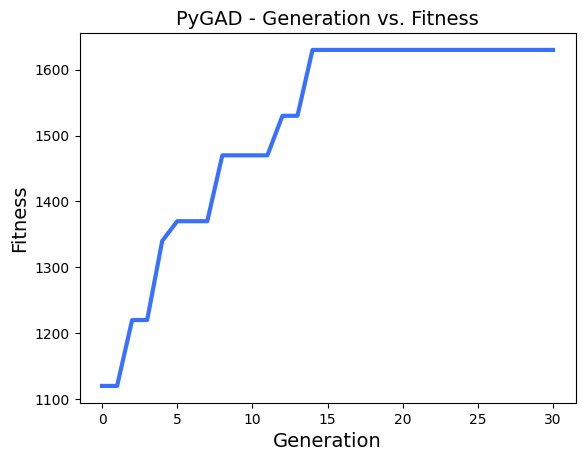

In [36]:
ga_instance.plot_fitness()
print()
